In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from io import StringIO

In [2]:
df = pd.read_csv(r"sarcasm_training_dataset\train-balanced-sarcasm.csv")
df

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...
...,...,...,...,...,...,...,...,...,...,...
1010821,1,I'm sure that Iran and N. Korea have the techn...,TwarkMain,reddit.com,2,2,0,2009-04,2009-04-25 00:47:52,"No one is calling this an engineered pathogen,..."
1010822,1,"whatever you do, don't vote green!",BCHarvey,climate,1,1,0,2009-05,2009-05-14 22:27:40,In a move typical of their recent do-nothing a...
1010823,1,Perhaps this is an atheist conspiracy to make ...,rebelcommander,atheism,1,1,0,2009-01,2009-01-11 00:22:57,Screw the Disabled--I've got to get to Church ...
1010824,1,The Slavs got their own country - it is called...,catsi,worldnews,1,1,0,2009-01,2009-01-23 21:12:49,I've always been unsettled by that. I hear a l...


In [3]:
pd.DataFrame(df['subreddit'].unique())

,0
0,politics
1,nba
2,nfl
3,BlackPeopleTwitter
4,MaddenUltimateTeam
...,...
14873,bestof2010
14874,DallasMeetups
14875,PigJargon
14876,Learnmusic


In [4]:
'economics' in df['subreddit'].unique()

False

In [5]:
econ_subreddits = df[df['subreddit'].str.contains('econ', case=False, na=False)]['subreddit'].unique()
print(econ_subreddits)


['Economics' 'MemeEconomy' 'porninfifteenseconds' 'woweconomy'
 'questionablecontent' 'secondstartotheright' 'austrian_economics'
 'economy' 'AskEconomics' 'LeagueConnect' 'InfamousSecondRP'
 'badeconomics' 'economicCollapse' 'YugiohEconomy' 'academiceconomics'
 'BernTheConvention' 'GhostRecon' 'Quakecon' 'secondamendment'
 'econometrics' 'WeHaveConcerns' 'TheContinuum' 'valuableconversation'
 'gw2economy' 'TalesoftheConvention' 'GhostReconPhantoms' 'mmt_economics'
 '30SecondsToMars' 'secondlife']


In [6]:
politics_subreddits = df[df['subreddit'].str.contains('politic', case=False, na=False)]['subreddit'].unique()

print(politics_subreddits)

['politics' 'ukpolitics' 'worldpolitics' 'PoliticalDiscussion'
 'CanadaPolitics' 'PoliticalVideo' 'POLITIC' 'AmericanPolitics'
 'BritishPolitics' 'Ask_Politics' 'PoliticalRevolutionGA'
 'Political_Revolution' 'AustralianPolitics' 'PoliticalHumor'
 'ShitPoliticsSays' 'PoliticalPhilosophy' 'Our_Politics'
 'CatholicPolitics' 'gunpolitics' 'NeutralPolitics' 'IDontLikeRPolitics'
 'moderatepolitics' 'PoliticalVideos' 'uspolitics' 'geopolitics'
 'Politics1' 'irishpolitics' 'paradoxpolitics' 'CivPolitics' 'badpolitics'
 'almostrealpolitics' 'PoliticalRevolutionAZ' 'Political_Bullshit'
 'badukpolitics' 'California_Politics' 'PoliticsToday' 'PoliticsUK'
 'politicalfactchecking' 'WorldNewsAndPolitics' 'MissouriPolitics'
 'PoliticalScience' 'VirginiaPolitics' 'ph_politics' 'CanadianPolitics'
 'fifthworldpolitics' 'politicalrap' 'PoliticallyCorrect' 'idpolitics'
 'PoliticalModeration' 'minnesotapolitics' 'QueenslandPolitics'
 'mormonpolitics' 'internationalpolitics' 'ncpolitics'
 'Politics_Uncensor

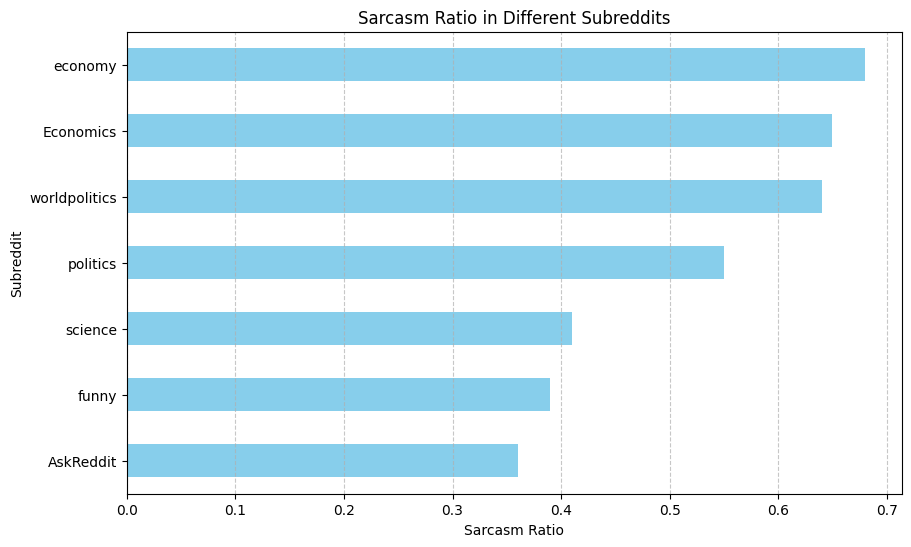

In [7]:
subreddits = ['funny', 'politics', 'worldpolitics', 'AskReddit', 'science', 'Economics', 'economy']
seed = 42

sampled_df = pd.DataFrame()

for subreddit in subreddits:
    subreddit_sample = df[df['subreddit'] == subreddit].sample(n=100, random_state=seed)
    sampled_df = pd.concat([sampled_df, subreddit_sample])

sarcasm_ratio = sampled_df.groupby('subreddit')['label'].mean().sort_values()

plt.figure(figsize=(10, 6))
sarcasm_ratio.plot(kind='barh', color='skyblue')
plt.title('Sarcasm Ratio in Different Subreddits')
plt.xlabel('Sarcasm Ratio')
plt.ylabel('Subreddit')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


In [8]:
sampled_df

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
960433,1,I'm 99% sure OP made this himself.,Fishyish,funny,1,1,0,2013-01,2013-01-09 00:51:16,Sigh. Repost. I've seen this picture months ag...
865364,0,Un-adulterated loathing!,ultimasage4,funny,3,3,0,2014-02,2014-02-20 23:17:31,"Loathing is a feeling, right?"
879711,1,I did not see this comment coming,gaven67,funny,2,2,0,2014-07,2014-07-25 09:29:54,"Yet this, is in fact, a repost."
377018,0,The one on the right turns me on...,commonabond,funny,1,1,0,2015-11,2015-11-01 23:00:23,Must... *resist*... electricity puns
911542,1,"Yeah, the Feds have been paying you loons to m...",da_chicken,funny,1,1,0,2013-12,2013-12-23 05:42:39,Alaska.. We're a strange bunch
...,...,...,...,...,...,...,...,...,...,...
661951,0,Ontario is in the same situation.,bllasae,economy,3,3,0,2015-06,2015-06-04 02:24:35,Rigged electricity market strikes Illinois: Th...
644120,1,No profit for the bank.,karabeckian,economy,0,0,0,2015-05,2015-05-20 12:49:00,"UK just experienced deflation, so why not.... ..."
926074,1,Who knew an athletic conference had so much po...,jbomble,economy,1,1,0,2012-12,2012-12-06 22:15:02,"SEC accuses Wells Fargo banker, 9 others of in..."
721536,0,Okay,bllasae,economy,1,1,0,2015-06,2015-06-14 16:52:00,LOL. Thanks for proving my point.


In [9]:
df_to_export = sampled_df[["comment", "score", "ups", "downs", "parent_comment"]]

df_to_export

,comment,score,ups,downs,parent_comment
960433,I'm 99% sure OP made this himself.,1,1,0,Sigh. Repost. I've seen this picture months ag...
865364,Un-adulterated loathing!,3,3,0,"Loathing is a feeling, right?"
879711,I did not see this comment coming,2,2,0,"Yet this, is in fact, a repost."
377018,The one on the right turns me on...,1,1,0,Must... *resist*... electricity puns
911542,"Yeah, the Feds have been paying you loons to m...",1,1,0,Alaska.. We're a strange bunch
...,...,...,...,...,...
661951,Ontario is in the same situation.,3,3,0,Rigged electricity market strikes Illinois: Th...
644120,No profit for the bank.,0,0,0,"UK just experienced deflation, so why not.... ..."
926074,Who knew an athletic conference had so much po...,1,1,0,"SEC accuses Wells Fargo banker, 9 others of in..."
721536,Okay,1,1,0,LOL. Thanks for proving my point.


In [10]:
df_to_export.to_csv("output_for_sarcasm_detection.csv", index=False)

In [11]:
prompt = "Read the given file. Depending on comment, parent_comment, score, ups, and downs, label whether it is sarcastic or not. Give your labels by creating a new CSV file. Columns should be: comment, parent_comment, score, ups, downs, sarcasm. Give your sarcasm decision as binary: 0 = is not, 1 = it is. For example: comment = yeah I agree LOL, parent_comment = we should decrease health expenses, score = 1, ups = 1, downs = 0, sarcasm = 1. Don't read another file, or ask me anything. Just do whatever I say. Now, here is the file:"

In [12]:
prompt

"Read the given file. Depending on comment, parent_comment, score, ups, and downs, label whether it is sarcastic or not. Give your labels by creating a new CSV file. Columns should be: comment, parent_comment, score, ups, downs, sarcasm. Give your sarcasm decision as binary: 0 = is not, 1 = it is. For example: comment = yeah I agree LOL, parent_comment = we should decrease health expenses, score = 1, ups = 1, downs = 0, sarcasm = 1. Don't read another file, or ask me anything. Just do whatever I say. Now, here is the file:"

In [13]:
original_df = sampled_df[["comment", "score", "ups", "downs", "parent_comment", "label"]].rename(columns={"label": "sarcasm"}).reset_index(drop=True)

In [14]:
original_df

,comment,score,ups,downs,parent_comment,sarcasm
0,I'm 99% sure OP made this himself.,1,1,0,Sigh. Repost. I've seen this picture months ag...,1
1,Un-adulterated loathing!,3,3,0,"Loathing is a feeling, right?",0
2,I did not see this comment coming,2,2,0,"Yet this, is in fact, a repost.",1
3,The one on the right turns me on...,1,1,0,Must... *resist*... electricity puns,0
4,"Yeah, the Feds have been paying you loons to m...",1,1,0,Alaska.. We're a strange bunch,1
...,...,...,...,...,...,...
695,Ontario is in the same situation.,3,3,0,Rigged electricity market strikes Illinois: Th...,0
696,No profit for the bank.,0,0,0,"UK just experienced deflation, so why not.... ...",1
697,Who knew an athletic conference had so much po...,1,1,0,"SEC accuses Wells Fargo banker, 9 others of in...",1
698,Okay,1,1,0,LOL. Thanks for proving my point.,0


In [15]:
gpt4o_df = pd.read_csv("danofer_sarcasm_detected_files/sarcasm_labeled_gpt4o.csv")
gpt4o_df

,comment,parent_comment,score,ups,downs,sarcasm
0,I'm 99% sure OP made this himself.,Sigh. Repost. I've seen this picture months ag...,1,1,0,1
1,Un-adulterated loathing!,"Loathing is a feeling, right?",3,3,0,0
2,I did not see this comment coming,"Yet this, is in fact, a repost.",2,2,0,0
3,The one on the right turns me on...,Must... *resist*... electricity puns,1,1,0,0
4,"Yeah, the Feds have been paying you loons to m...",Alaska.. We're a strange bunch,1,1,0,1
...,...,...,...,...,...,...
695,Ontario is in the same situation.,Rigged electricity market strikes Illinois: Th...,3,3,0,0
696,No profit for the bank.,"UK just experienced deflation, so why not.... ...",0,0,0,0
697,Who knew an athletic conference had so much po...,"SEC accuses Wells Fargo banker, 9 others of in...",1,1,0,0
698,Okay,LOL. Thanks for proving my point.,1,1,0,0


In [16]:
gpt45_df = pd.read_csv("danofer_sarcasm_detected_files/sarcasm_labeled_gpt45.csv")
gpt45_df

,comment,parent_comment,score,ups,downs,sarcasm
0,I'm 99% sure OP made this himself.,Sigh. Repost. I've seen this picture months ag...,1,1,0,1
1,Un-adulterated loathing!,"Loathing is a feeling, right?",3,3,0,0
2,I did not see this comment coming,"Yet this, is in fact, a repost.",2,2,0,1
3,The one on the right turns me on...,Must... *resist*... electricity puns,1,1,0,1
4,"Yeah, the Feds have been paying you loons to m...",Alaska.. We're a strange bunch,1,1,0,0
...,...,...,...,...,...,...
695,Ontario is in the same situation.,Rigged electricity market strikes Illinois: Th...,3,3,0,0
696,No profit for the bank.,"UK just experienced deflation, so why not.... ...",0,0,0,1
697,Who knew an athletic conference had so much po...,"SEC accuses Wells Fargo banker, 9 others of in...",1,1,0,0
698,Okay,LOL. Thanks for proving my point.,1,1,0,0


In [17]:
gemini25pro_df = pd.read_csv("danofer_sarcasm_detected_files/sarcasm_labeled_gemini25pro.csv")
gemini25pro_df

,comment,parent_comment,score,ups,downs,sarcasm
0,I'm 99% sure OP made this himself.,Sigh. Repost. I've seen this picture months ag...,1,1,0,1.0
1,Un-adulterated loathing!,"Loathing is a feeling, right?",3,3,0,0.0
2,I did not see this comment coming,"Yet this, is in fact, a repost.",2,2,0,1.0
3,The one on the right turns me on...,Must... *resist*... electricity puns,1,1,0,0.0
4,"Yeah, the Feds have been paying you loons to m...",Alaska.. We're a strange bunch,1,1,0,1.0
...,...,...,...,...,...,...
695,Ontario is in the same situation.,Rigged electricity market strikes Illinois: Th...,3,3,0,0.0
696,No profit for the bank.,"UK just experienced deflation, so why not.... ...",0,0,0,0.0
697,Who knew an athletic conference had so much po...,"SEC accuses Wells Fargo banker, 9 others of in...",1,1,0,1.0
698,Okay,LOL. Thanks for proving my point.,1,1,0,0.0


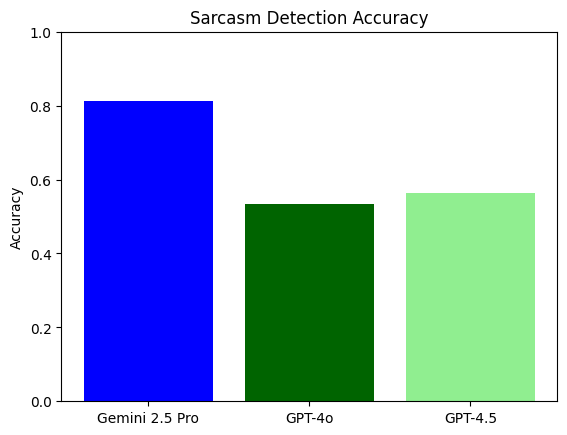

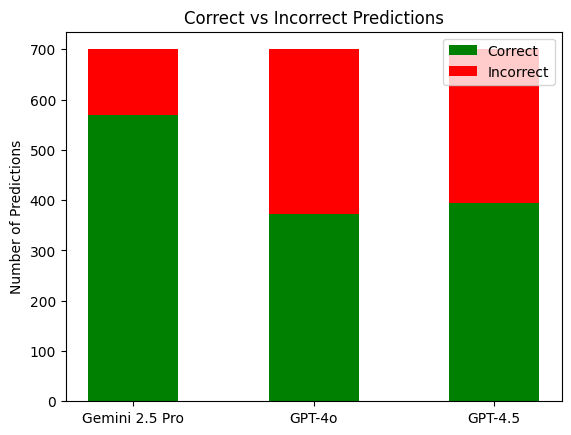

In [18]:
original_df["correct_gemini_25"] = gemini25pro_df["sarcasm"] == original_df["sarcasm"]
original_df["correct_gpt4o"] = gpt4o_df["sarcasm"] == original_df["sarcasm"]
original_df["correct_gpt45"] = gpt45_df["sarcasm"] == original_df["sarcasm"]


plt.bar(
    ["Gemini 2.5 Pro", "GPT-4o", "GPT-4.5"],
    [original_df["correct_gemini_25"].mean(), original_df["correct_gpt4o"].mean(), original_df["correct_gpt45"].mean()],
    color=["blue", "darkgreen", "lightgreen"]
)
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Sarcasm Detection Accuracy")
plt.show()

# Correct vs Incorrect Count Plot
correct_counts = [
    original_df["correct_gemini_25"].sum(),
    original_df["correct_gpt4o"].sum(),
    original_df["correct_gpt45"].sum()
]
incorrect_counts = [
    len(original_df) - correct_counts[0],
    len(original_df) - correct_counts[1],
    len(original_df) - correct_counts[2]
]

bar_width = 0.5
x = np.arange(3)

plt.bar(x, correct_counts, color="green", width=bar_width, label="Correct")
plt.bar(x, incorrect_counts, bottom=correct_counts, color="red", width=bar_width, label="Incorrect")
plt.xticks(x, ["Gemini 2.5 Pro", "GPT-4o", "GPT-4.5"])
plt.ylabel("Number of Predictions")
plt.title("Correct vs Incorrect Predictions")
plt.legend()
plt.show()

In [19]:
llama_df = pd.read_csv("danofer_sarcasm_detected_files/sarcasm_labeled_LLama3-1-8B-Instruct.csv")
llama_df

,comment,score,ups,downs,parent_comment,sarcasm
0,I'm 99% sure OP made this himself.,1,1,0,Sigh. Repost. I've seen this picture months ag...,0
1,Un-adulterated loathing!,3,3,0,"Loathing is a feeling, right?",1
2,I did not see this comment coming,2,2,0,"Yet this, is in fact, a repost.",0
3,The one on the right turns me on...,1,1,0,Must... *resist*... electricity puns,1
4,"Yeah, the Feds have been paying you loons to m...",1,1,0,Alaska.. We're a strange bunch,1
...,...,...,...,...,...,...
695,Ontario is in the same situation.,3,3,0,Rigged electricity market strikes Illinois: Th...,0
696,No profit for the bank.,0,0,0,"UK just experienced deflation, so why not.... ...",0
697,Who knew an athletic conference had so much po...,1,1,0,"SEC accuses Wells Fargo banker, 9 others of in...",0
698,Okay,1,1,0,LOL. Thanks for proving my point.,1


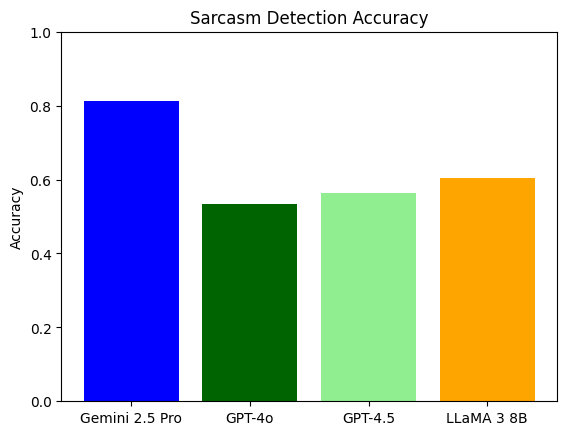

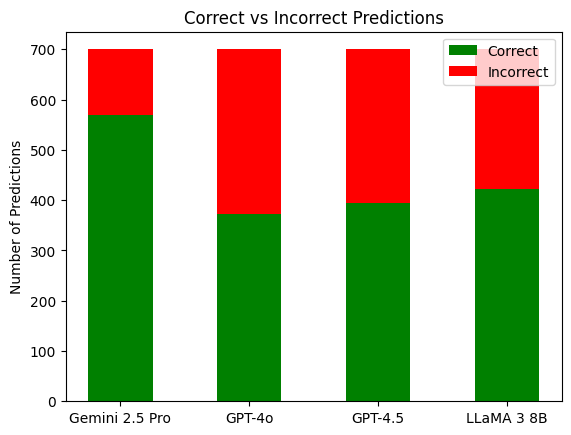

In [20]:
# Compute correctness for LLaMA
original_df["correct_llama"] = llama_df["sarcasm"] == original_df["sarcasm"]

# Accuracy Bar Chart (including LLaMA)
accuracies = [
    original_df["correct_gemini_25"].mean(),
    original_df["correct_gpt4o"].mean(),
    original_df["correct_gpt45"].mean(),
    original_df["correct_llama"].mean()
]

plt.bar(
    ["Gemini 2.5 Pro", "GPT-4o", "GPT-4.5", "LLaMA 3 8B"],
    accuracies,
    color=["blue", "darkgreen", "lightgreen", "orange"]
)
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Sarcasm Detection Accuracy")
plt.show()

# Correct vs Incorrect Count Plot (including LLaMA)
correct_counts = [
    original_df["correct_gemini_25"].sum(),
    original_df["correct_gpt4o"].sum(),
    original_df["correct_gpt45"].sum(),
    original_df["correct_llama"].sum()
]

incorrect_counts = [
    len(original_df) - correct_counts[0],
    len(original_df) - correct_counts[1],
    len(original_df) - correct_counts[2],
    len(original_df) - correct_counts[3]
]

x = np.arange(4)
bar_width = 0.5

plt.bar(x, correct_counts, color="green", width=bar_width, label="Correct")
plt.bar(x, incorrect_counts, bottom=correct_counts, color="red", width=bar_width, label="Incorrect")
plt.xticks(x, ["Gemini 2.5 Pro", "GPT-4o", "GPT-4.5", "LLaMA 3 8B"])
plt.ylabel("Number of Predictions")
plt.title("Correct vs Incorrect Predictions")
plt.legend()
plt.show()


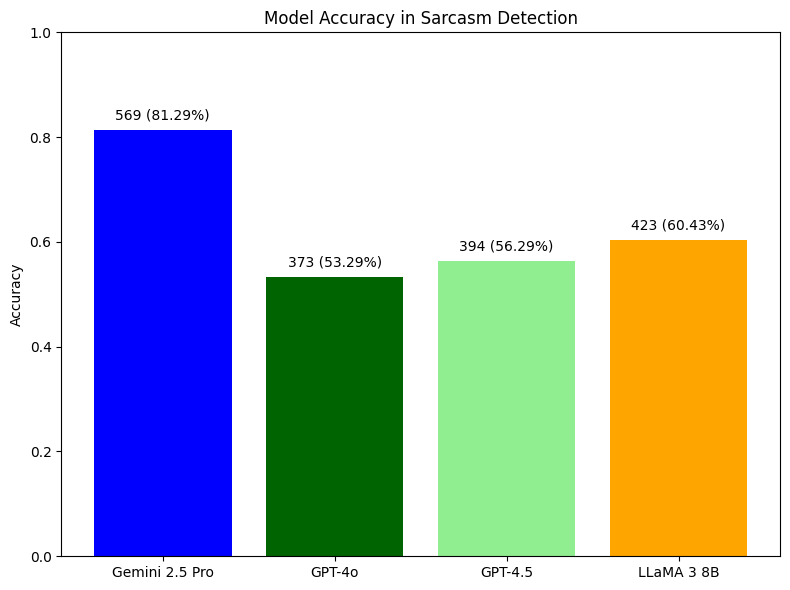

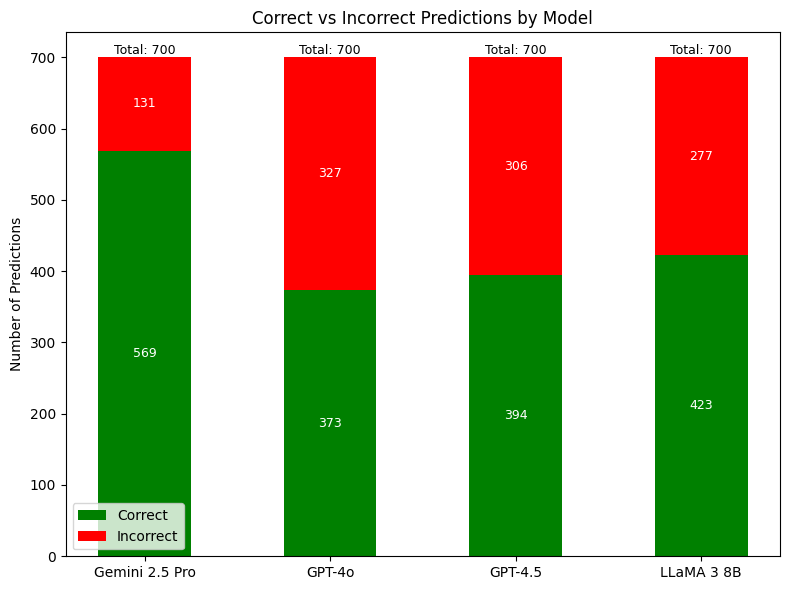

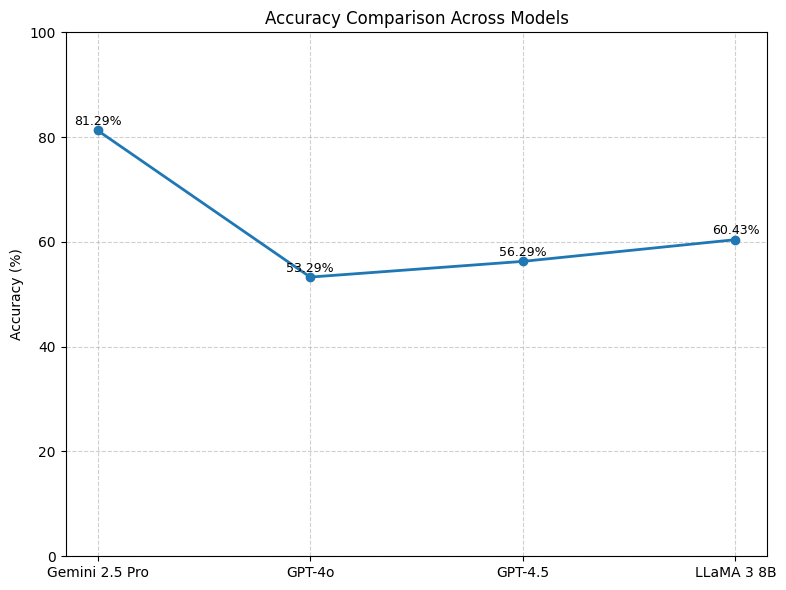

In [21]:
# Accuracy values
accuracies = [
    original_df["correct_gemini_25"].mean(),
    original_df["correct_gpt4o"].mean(),
    original_df["correct_gpt45"].mean(),
    original_df["correct_llama"].mean()
]
accuracy_counts = [
    original_df["correct_gemini_25"].sum(),
    original_df["correct_gpt4o"].sum(),
    original_df["correct_gpt45"].sum(),
    original_df["correct_llama"].sum()
]
labels = ["Gemini 2.5 Pro", "GPT-4o", "GPT-4.5", "LLaMA 3 8B"]

# Bar plot - Accuracy
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, accuracies, color=["blue", "darkgreen", "lightgreen", "orange"])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy in Sarcasm Detection")

for bar, acc, count in zip(bars, accuracies, accuracy_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{count} ({acc:.2%})", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Bar plot - Correct vs Incorrect
correct_counts = accuracy_counts
incorrect_counts = [len(original_df) - c for c in correct_counts]
x = np.arange(len(labels))
bar_width = 0.5

plt.figure(figsize=(8, 6))
correct_bars = plt.bar(x, correct_counts, color="green", width=bar_width, label="Correct")
incorrect_bars = plt.bar(x, incorrect_counts, bottom=correct_counts, color="red", width=bar_width, label="Incorrect")
plt.xticks(x, labels)
plt.ylabel("Number of Predictions")
plt.title("Correct vs Incorrect Predictions by Model")
plt.legend()

for i in range(len(x)):
    total = correct_counts[i] + incorrect_counts[i]
    plt.text(x[i], correct_counts[i]/2, f"{correct_counts[i]}", ha='center', va='center', color="white", fontsize=9)
    plt.text(x[i], correct_counts[i] + incorrect_counts[i]/2, f"{incorrect_counts[i]}", ha='center', va='center', color="white", fontsize=9)
    plt.text(x[i], total + 5, f"Total: {total}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Line plot - Accuracy trend
plt.figure(figsize=(8, 6))
plt.plot(labels, [a * 100 for a in accuracies], marker='o', linestyle='-', linewidth=2)
plt.ylim(0, 100)
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison Across Models")
for i, (label, acc) in enumerate(zip(labels, accuracies)):
    plt.text(i, acc * 100 + 1, f"{acc:.2%}", ha='center', fontsize=9)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
